In [1]:
import pypangraph as pp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import defaultdict

from jedi.inference.utils import to_list

In [3]:
graph = pp.Pangraph.from_json("data/Ot_pangraph_2.json")

In [4]:
print(graph)


pangraph object with 17 paths, 6829 blocks and 136050 nodes


##### Nodes are different alleles of multiple sequence alignments (blocks). Each genomes is represented by a specific path to connect the blocks in a pangraph.

In [4]:
print(graph.paths.keys())

['TA686', 'TA763', 'UT176', 'UT76', 'Boryong', 'Gilliam', 'Ikeda', 'Karp', 'Kato', 'TW1', 'TW22', 'wgot003', 'wgot004', 'wgot005', 'wgot013', 'wgot019', 'wuj2014']


In [5]:
# TA686 as an example
path = graph.paths["TA686"]
print(path)

path object | name = TA686, n. nodes = 8342, length = 2254553 bp


In [5]:
stats_df = graph.to_blockstats_df()
print(stats_df)
print(sum(stats_df.len))

                      count  n_strains  duplicated   core   len
block_id                                                       
4307957464674577          1          1       False  False   451
8466826177821381         37          2        True  False   111
12546312725377421        11         11       False  False   144
16912531280914834         6          3        True  False   153
16932795954189699         1          1       False  False   125
...                     ...        ...         ...    ...   ...
18437907547878183316      1          1       False  False   235
18438800320991657892     14         14       False  False   156
18439581321675985485     17         17       False   True  3539
18440695756679249751     15          2        True  False   103
18440782846265365523      2          2       False  False   455

[6829 rows x 5 columns]
2191146


In [21]:
core_df = stats_df[stats_df['core']==True]
print(core_df)
mean_core_length = core_df['len'].mean()
print(mean_core_length)
median_core_length = core_df['len'].median()
print(median_core_length)
print(sum(core_df['len']))
print(sum(core_df["count"]))

                      count  n_strains  duplicated  core   len
block_id                                                      
58576054644115744        17         17       False  True   664
664134223545333388       17         17       False  True  7154
701838148923023549       17         17       False  True   686
737217510067900859       17         17       False  True  7199
857231932303968161       17         17       False  True  2598
...                     ...        ...         ...   ...   ...
18065799159705300972     17         17       False  True  2935
18117603454931954073     17         17       False  True  1338
18231772836069358337     17         17       False  True  6098
18327239572038403487     17         17       False  True  1100
18439581321675985485     17         17       False  True  3539

[262 rows x 5 columns]
2955.671755725191
1817.5
774386
4454


In [9]:
core90_df = stats_df.copy()
core90_df["core"] = thresholds_df["core_90"]
core80_df = stats_df.copy()
core80_df["core"] = thresholds_df["core_80"]
core70_df = stats_df.copy()
core70_df["core"] = thresholds_df["core_70"]
print(core70_df)

                      count  n_strains  duplicated   core   len
block_id                                                       
4307957464674577          1          1       False  False   451
8466826177821381         37          2        True  False   111
12546312725377421        11         11       False  False   144
16912531280914834         6          3        True  False   153
16932795954189699         1          1       False  False   125
...                     ...        ...         ...    ...   ...
18437907547878183316      1          1       False  False   235
18438800320991657892     14         14       False   True   156
18439581321675985485     17         17       False   True  3539
18440695756679249751     15          2        True  False   103
18440782846265365523      2          2       False  False   455

[6829 rows x 5 columns]


##### there are 262 core gene blocks

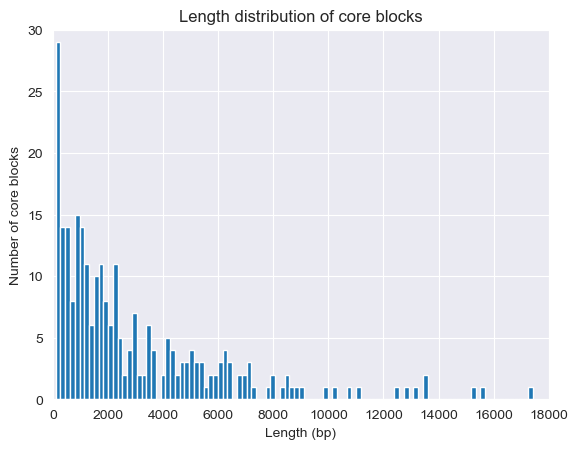

In [30]:
plt.hist(core_df.len,bins=100)
plt.title("Length distribution of core blocks")
plt.xlabel("Length (bp)")
plt.ylabel("Number of core blocks")
plt.xlim((0,18000))
plt.ylim((0,30))
plt.savefig("output/core_block_length_distribution.pdf")
plt.show()

In [11]:
#core95_df = stats_df[thresholds_df['core_95']==True]
#core90_df = stats_df[thresholds_df['core_90']==True]
#core80_df = stats_df[thresholds_df['core_80']==True]
#core75_df = stats_df[thresholds_df['core_75']==True]
#core70_df = stats_df[thresholds_df['core_70']==True]

## Pangenome frequency visualisation

In [22]:
nstrain = stats_df.n_strains.to_list()
counts = []
for n in range(1,18):
    counts.append(nstrain.count(n))

print(counts)
print(sum(counts))

[2022, 1514, 457, 423, 251, 184, 159, 136, 161, 96, 118, 103, 155, 163, 228, 193, 466]
6829


In [29]:
ncore = stats_df.core.to_list()
print(ncore.count(True))
non_core_df = stats_df[stats_df['core']==False]
#non_core_df.to_csv("output/non_core_blocks.csv",sep=",")
nnstrain = non_core_df.n_strains.to_list()
print(nnstrain.count(17))
nn17_df = non_core_df[non_core_df['n_strains']==17]
print(nn17_df)
nn17_df.to_csv("output/non_core_17.csv",sep=',')

262
204
                      count  n_strains  duplicated   core  len
block_id                                                      
17263251561688874       286         17        True  False  195
76767864699479040       116         17        True  False  168
256434466745157978       90         17        True  False  171
329682027710503481       26         17        True  False  360
370647579004227262      230         17        True  False  241
...                     ...        ...         ...    ...  ...
17816810365490491685    120         17        True  False  236
17906020568802533292    381         17        True  False  149
18083746519488259627    371         17        True  False  123
18087953327905636676    630         17        True  False  220
18300813909975695240    303         17        True  False  125

[204 rows x 5 columns]


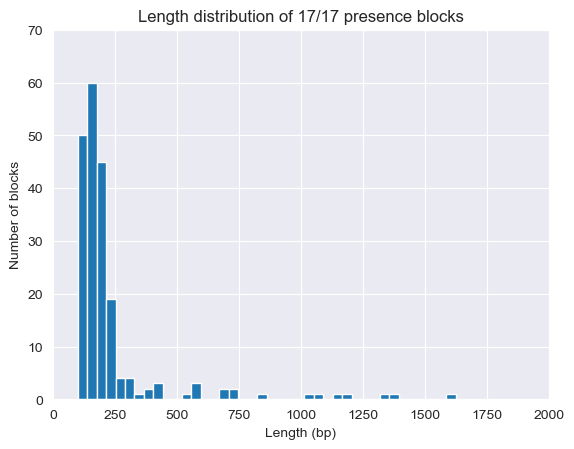

In [35]:
plt.hist(nn17_df.len,bins=40)
plt.title("Length distribution of 17/17 presence blocks")
plt.xlabel("Length (bp)")
plt.ylabel("Number of blocks")
plt.xlim((0,2000))
plt.ylim((0,70))
#plt.savefig("output/non_core_17.pdf")
plt.show()

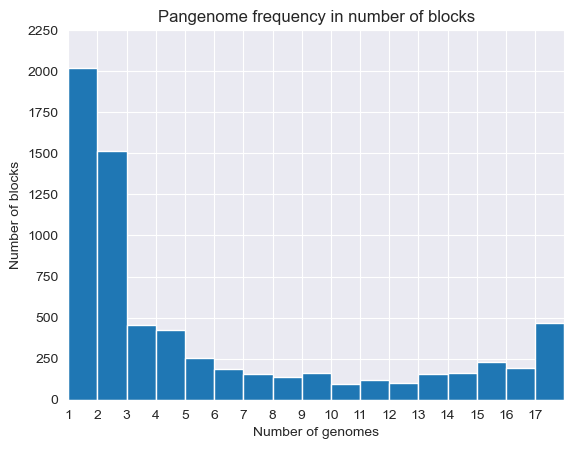

In [19]:
plt.hist(stats_df.n_strains,bins=np.arange(1,19))
plt.title("Pangenome frequency in number of blocks")
plt.xlabel("Number of genomes")
plt.ylabel("Number of blocks")
plt.xlim(1,18)
plt.ylim((0,2250))
plt.xticks(np.arange(1, 18))
plt.savefig("output/block_number_distribution.pdf")
plt.show()

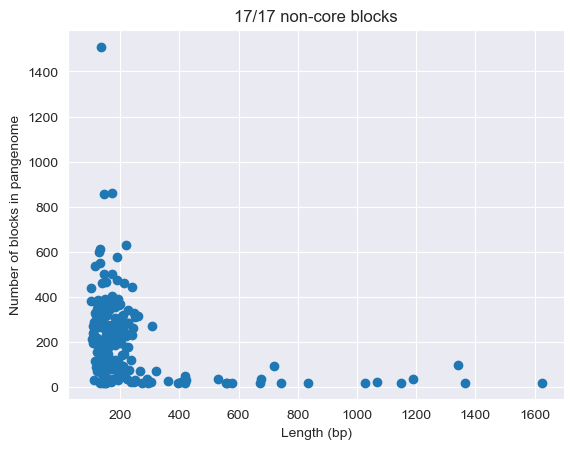

In [37]:
plt.scatter(nn17_df["len"],nn17_df["count"])
plt.xlabel("Length (bp)")
plt.ylabel("Number of blocks in pangenome")
plt.title("17/17 non-core blocks")
plt.show()

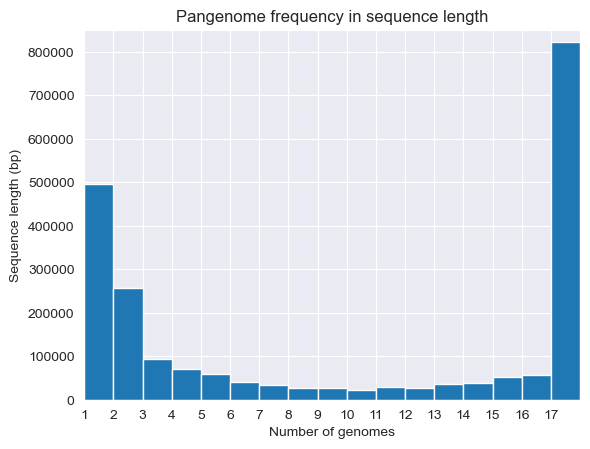

In [20]:
plt.hist(stats_df.n_strains,bins=np.arange(1,19),weights=stats_df.len)
plt.title("Pangenome frequency in sequence length")
plt.xlabel("Number of genomes")
plt.ylabel("Sequence length (bp)")
plt.xlim(1,18)
plt.ylim((0,850000))
plt.xticks(np.arange(1, 18))
plt.savefig("output/block_length_distribution.pdf")
plt.show()

## Block presence-absence

In [14]:
bl_count = graph.to_blockcount_df()
#print(bl_count)

<Axes: xlabel='block_id', ylabel='path_id'>

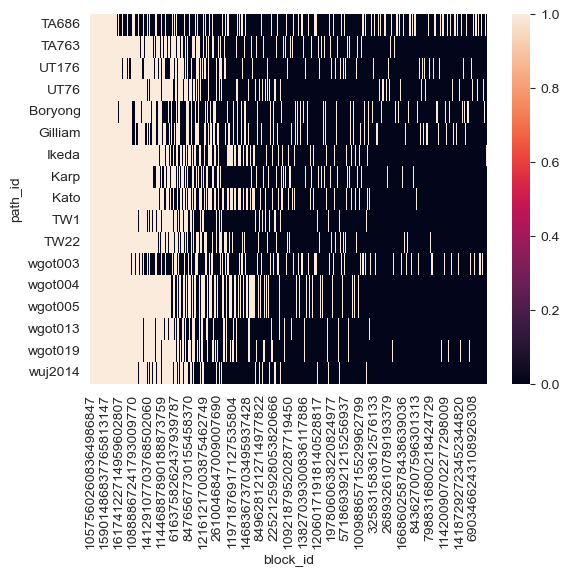

In [15]:
# block presence-absence matrix
block_PA = bl_count > 0
# order blocks by frequency
bl_order = block_PA.sum(axis=1).sort_values(ascending=False).index
# plot presence-absence matrix
sns.heatmap(block_PA.loc[bl_order].T)

## Visualising paths

### 100% core

In [16]:
path_dict = graph.to_path_dictionary()
#print(path_dict)

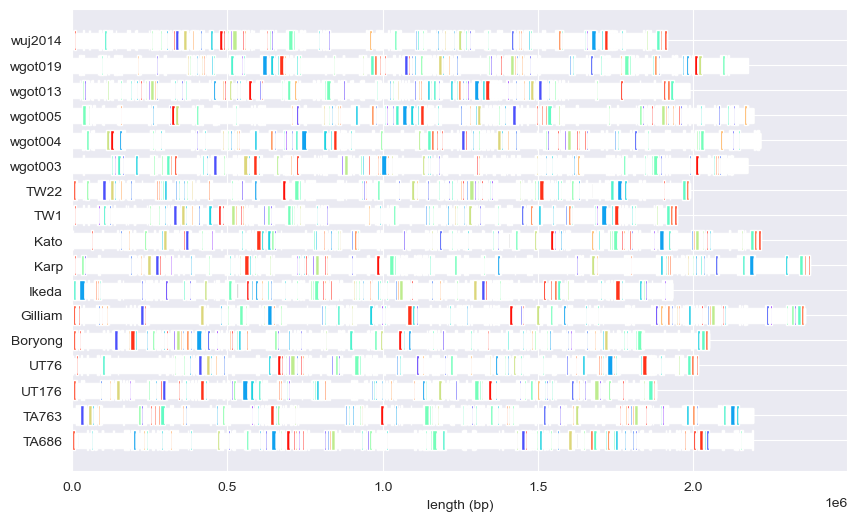

In [17]:
block_stats = graph.to_blockstats_df()
# dictionary to assign a new random color to each block
block_color = defaultdict(lambda: plt.cm.rainbow(np.random.rand()))

fig, ax = plt.subplots(figsize=(10, 6))

y = 0
for path_name, path in path_dict.items():
    x = 0
    for block_id, block_strand in path:

        L = block_stats.loc[block_id, "len"] # block consensus length
        is_core = block_stats.loc[block_id, "core"]

        # block color
        color = block_color[block_id] if is_core else "lightgray"
        block_color[block_id] = mpl.colors.to_hex(color)

        height = 0.8 if is_core else 0.6 # block thickness

        ax.barh(y, L, left=x, height=height, color=color)

        x += L
    y += 1

ax.set_yticks(range(len(path_dict)))
ax.set_yticklabels(path_dict.keys())
ax.set_xlabel("length (bp)")
plt.savefig("output/synteny.pdf",format="pdf")
plt.show()


#### Removing assessory bocks and merging blocks into minimal synteny units

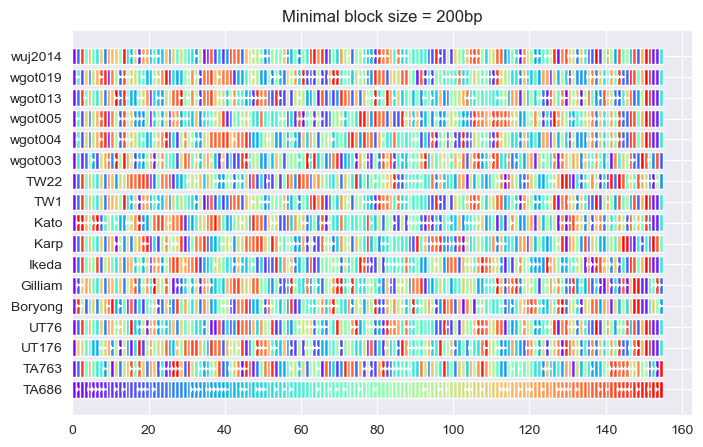

In [18]:
# find MSUs
threshold_len = 200  # minimal length of core blocks to consider
MSU_mergers, MSU_paths, MSU_len = pp.minimal_synteny_units(graph, threshold_len)
# dictionary to assign colors to MSUs
cmap = mpl.colormaps["rainbow"]
color_generator = (cmap(i / len(MSU_len)) for i in range(len(MSU_len)))
colors = defaultdict(lambda: next(color_generator))

fig, ax = plt.subplots(figsize=(8, 5))

for i, (iso, path) in enumerate(MSU_paths.items()):
    for j, node in enumerate(path.nodes):
        ax.barh(i, 1, left=j, color=colors[node.id])
        if not node.strand:
            ax.arrow(j + 1, i, -0.8, 0, head_width=0.2, head_length=0.2)
ax.set_yticks(range(len(MSU_paths)))
ax.set_yticklabels(list(MSU_paths.keys()))
plt.title("Minimal block size = 200bp")
plt.savefig("output/MSU_core100_min200.pdf",format="pdf")
plt.show()

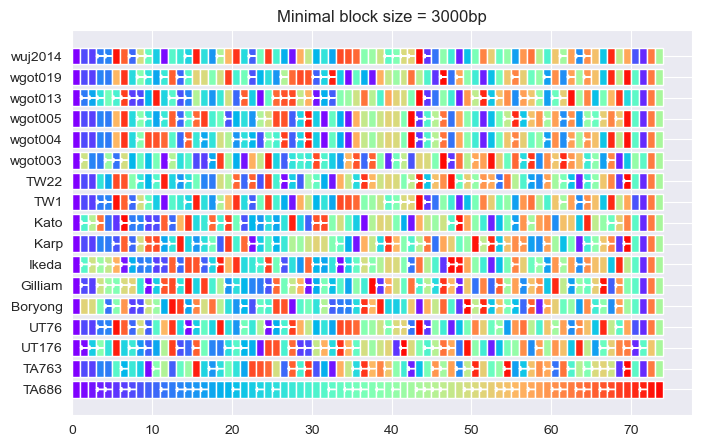

In [19]:
threshold_len = 3000  # minimal length of core blocks to consider
MSU_mergers, MSU_paths, MSU_len = pp.minimal_synteny_units(graph, threshold_len)
# dictionary to assign colors to MSUs
cmap = mpl.colormaps["rainbow"]
color_generator = (cmap(i / len(MSU_len)) for i in range(len(MSU_len)))
colors = defaultdict(lambda: next(color_generator))

fig, ax = plt.subplots(figsize=(8, 5))

for i, (iso, path) in enumerate(MSU_paths.items()):
    for j, node in enumerate(path.nodes):
        ax.barh(i, 1, left=j, color=colors[node.id])
        if not node.strand:
            ax.arrow(j + 1, i, -0.8, 0, head_width=0.2, head_length=0.2)
ax.set_yticks(range(len(MSU_paths)))
ax.set_yticklabels(list(MSU_paths.keys()))
plt.title("Minimal block size = 3000bp")
plt.savefig("output/MSU_core100_min3000.pdf",format="pdf")
plt.show()

### 90% core (15/17)

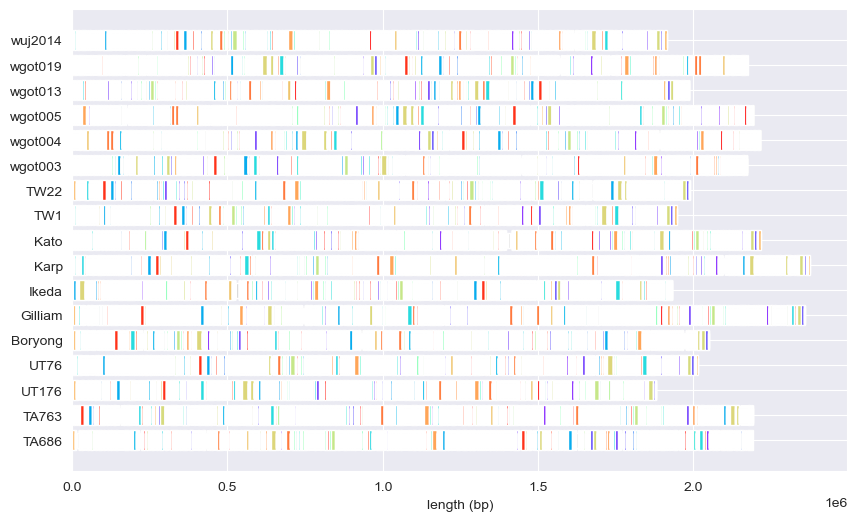

In [20]:
block_stats = core90_df
# dictionary to assign a new random color to each block
block_color = defaultdict(lambda: plt.cm.rainbow(np.random.rand()))

fig, ax = plt.subplots(figsize=(10, 6))
y = 0
for path_name, path in path_dict.items():
    x = 0
    for block_id, block_strand in path:

        L = block_stats.loc[block_id, "len"] # block consensus length
        is_core = block_stats.loc[block_id, "core"]

        # block color
        color = block_color[block_id] if is_core else "lightgray"
        block_color[block_id] = mpl.colors.to_hex(color)

        height = 0.8 if is_core else 0.6 # block thickness

        ax.barh(y, L, left=x, height=height, color=color)

        x += L
    y += 1
ax.set_yticks(range(len(path_dict)))
ax.set_yticklabels(path_dict.keys())
ax.set_xlabel("length (bp)")
plt.savefig("output/synteny_core90.pdf",format="pdf")
plt.show()


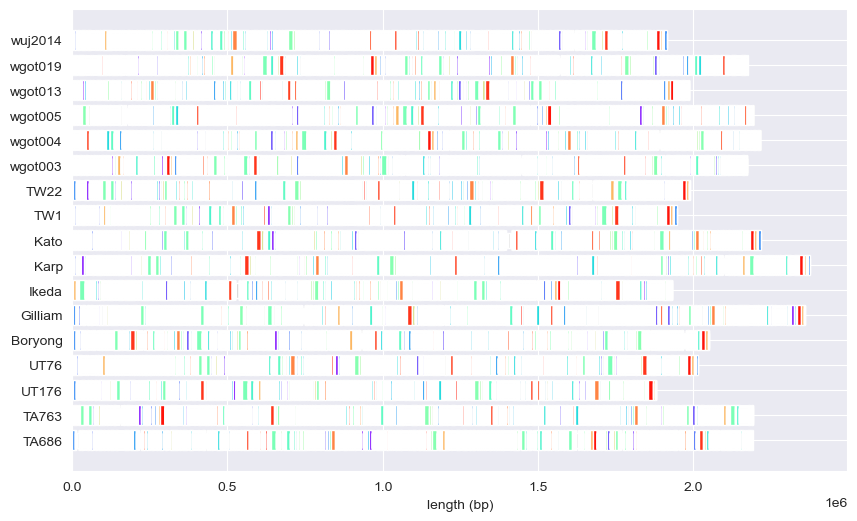

In [21]:
block_stats = core80_df
# dictionary to assign a new random color to each block
block_color = defaultdict(lambda: plt.cm.rainbow(np.random.rand()))

fig, ax = plt.subplots(figsize=(10, 6))

y = 0
for path_name, path in path_dict.items():
    x = 0
    for block_id, block_strand in path:

        L = block_stats.loc[block_id, "len"] # block consensus length
        is_core = block_stats.loc[block_id, "core"]

        # block color
        color = block_color[block_id] if is_core else "lightgray"
        block_color[block_id] = mpl.colors.to_hex(color)

        height = 0.8 if is_core else 0.6 # block thickness

        ax.barh(y, L, left=x, height=height, color=color)

        x += L
    y += 1

ax.set_yticks(range(len(path_dict)))
ax.set_yticklabels(path_dict.keys())
ax.set_xlabel("length (bp)")
plt.savefig("output/synteny_core80.pdf",format="pdf")
plt.show()


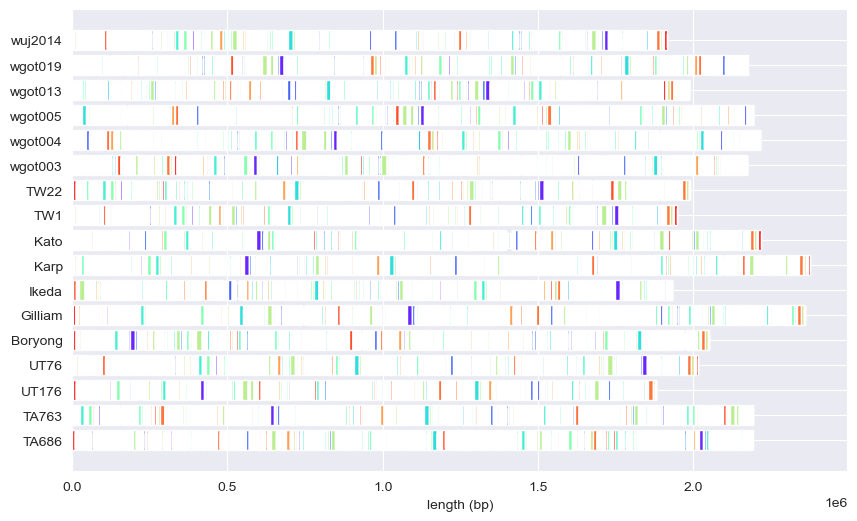

In [22]:
block_stats = core70_df
# dictionary to assign a new random color to each block
block_color = defaultdict(lambda: plt.cm.rainbow(np.random.rand()))

fig, ax = plt.subplots(figsize=(10, 6))
y = 0
for path_name, path in path_dict.items():
    x = 0
    for block_id, block_strand in path:

        L = block_stats.loc[block_id, "len"] # block consensus length
        is_core = block_stats.loc[block_id, "core"]

        # block color
        color = block_color[block_id] if is_core else "lightgray"
        block_color[block_id] = mpl.colors.to_hex(color)

        height = 0.8 if is_core else 0.6 # block thickness

        ax.barh(y, L, left=x, height=height, color=color)

        x += L
    y += 1
ax.set_yticks(range(len(path_dict)))
ax.set_yticklabels(path_dict.keys())
ax.set_xlabel("length (bp)")
plt.savefig("output/synteny_core70.pdf",format="pdf")
plt.show()
